In [2]:
#Luodaan Monte Carlo simulaatio S&P 500 tuotoista. Monte Carlo simulaatio on hyödyllinen 
#keino ennustaa jotain tulevaisuuden arvoa, josta ei ole täyttä varmuutta ja siksi sitä kannattaa lähestyä
#todennäköisyysjakauman kautta.

In [3]:
#Tarvitaan keskimääräinen tuotto, historiallinen volatiliteetti eli keskihajonta ja sitten vielä sijoitusvuodet. Etsitään S&P
#500 tiedot yfinance avulla.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [4]:
sp500_data = yf.download('^GSPC', start='1994-01-01', end='2024-09-01') #Otetaan tiedot viimeisen 30 vuoden data

[*********************100%%**********************]  1 of 1 completed


In [5]:
sp500 = sp500_data['Adj Close'].pct_change() #Muutetaan muutokset prosentuaalisiksi
print(sp500.head(10)) 

Date
1994-01-03         NaN
1994-01-04    0.003115
1994-01-05    0.001414
1994-01-06   -0.000920
1994-01-07    0.005951
1994-01-10    0.011428
1994-01-11   -0.002399
1994-01-12    0.000084
1994-01-13   -0.003585
1994-01-14    0.005164
Name: Adj Close, dtype: float64


In [6]:
#Lasketaan keskihajonta eli sigma
sigma = sp500.std() #Lasketaan päivittäinen volatiliteetti
vuotuinen_sigma = sigma * np.sqrt(252)
print(sigma) #Päivittäinen volatiliteetti
print(vuotuinen_sigma)

0.011770582059792147
0.18685219750013055


In [7]:
#Lasketaan tuotto-odotus eli mu
avg_tuotto = sp500.mean() #Päivittäinen keskimääräinen tuotto
kasvu = (1 + avg_tuotto)** 252 #Tavallinen korkoa korolle kaava, jolla saadaan vuotuinen tuotto.
mu = kasvu - 1 #Vähennetään 1 niin saadaan pelkkä kasvuprosentti
print(kasvu)
print(mu)

1.1040375517976468
0.10403755179764684


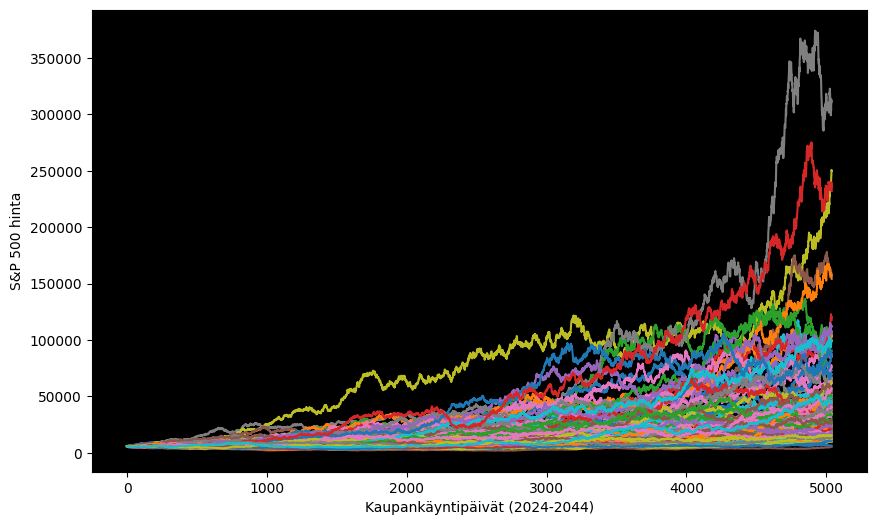

In [68]:
#Tehdään käyriä silmukan sisällä, jotka havainnollistaa yksittäisiä simulaatioita päivittäin. 
plt.figure(figsize=(10,6)) #Kuvan koko
plt.xlabel('Kaupankäyntipäivät (2024-2044)')
plt.ylabel('S&P 500 hinta')
ax = plt.gca()
ax.set_facecolor('black')
viimeinen = sp500_data['Adj Close'].iloc[-1] #Halutaan viimeinen Adj Close hinta, josta simulaatio aloitetaan
viimeiset_hinnat = [] #Lista johon tallennetaan kunkin simulaation viimeinen hinta eli vuoden 2044 hinta

for i in range(100):
    pv_tuotot = np.random.normal(avg_tuotto, sigma, (252*20))  #252 ovat vuotuisten kaupankäyntipäivien lkm ja 20 on vuotta
    hinnat = viimeinen * (pv_tuotot + 1).cumprod() #Päivittäiset ovat kasvukertoimia ja ne kaikki kerrotaan keskenään
    viimeinen_hinta = hinnat[-1] #Otetaan simulaation viimeinen hinta eli vuoden 2044 hinta
    viimeiset_hinnat.append(viimeinen_hinta) #Lisätään viimeinen hinta listaan, josta myöhemmin katsotaan tietoja
    plt.plot(hinnat) #Piirretään kuvaaja

In [69]:
kuvaajan_mediaani = pd.DataFrame(viimeiset_hinnat).median()
viimeinen = sp500_data['Adj Close'].iloc[-1] #Viimeinen hinta nyt vuonna 2024
vuotuinen_tuotto = ((kuvaajan_mediaani/viimeinen) ** (1/20) - 1) * 100 #Lasketaan vuotuinen tuotto
print(f'S&P 500 mediaanihinta tarkasteluhetken lopussa: {kuvaajan_mediaani[0]:.2f}')
print(f"Vuotuinen tuotto: {vuotuinen_tuotto[0]:.2f}%")
print(f"25% kvartaali: {np.percentile(viimeiset_hinnat, 25):.2f}")
print(f"75% kvartaali: {np.percentile(viimeiset_hinnat, 75):.2f}")

S&P 500 mediaanihinta tarkasteluhetken lopussa: 35654.82
Vuotuinen tuotto: 9.65%
25% kvartaali: 20045.77
75% kvartaali: 56569.26
